# Table of Contents<a id='toc0_'></a>    
- 1. [Central Research Question: **Which factors are most correlated with student performance?**](#toc1_)    
  - 1.1. [Hypothesis 1: **Both study hours and attendance records have a positive correlation with exam performance.**](#toc1_1_)    
  - 1.2. [Hypothesis 2: **Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.**](#toc1_2_)    
  - 1.3. [Hypothesis 3: **High parental involvement and positive peer influence positively impact student performance in exams.**](#toc1_3_)    
- 2. [Data Preparation](#toc2_)    
  - 2.1. [Looking at the Updated DataFrame](#toc2_1_)    
  - 2.2. [Data Dictionary](#toc2_2_)    
  - 2.3. [Linear Regression Functions](#toc2_3_)    
- 3. [Findings](#toc3_)    
  - 3.1. [Hypothesis 1](#toc3_1_)    
    - 3.1.1. [Finding 1](#toc3_1_1_)    
  - 3.2. [Hypothesis 2](#toc3_2_)    
    - 3.2.1. [Finding 2](#toc3_2_1_)    
  - 3.3. [Hypothesis 3](#toc3_3_)    
    - 3.3.1. [Finding 3](#toc3_3_1_)    
  - 3.4. [Feature Importances](#toc3_4_)    
    - 3.4.1. [Scaling input variables](#toc3_4_1_)    
    - 3.4.2. [***Random Forest***](#toc3_4_2_)    
    - 3.4.3. [***Permutation***](#toc3_4_3_)    
    - 3.4.4. [***Lasso Regression***](#toc3_4_4_)    
    - 3.4.5. [Findings](#toc3_4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [148]:
%autosave 0

Autosave disabled


In [149]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [150]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Student Performance Factors

This dataset provides a comprehensive overview of select factors affecting student performance on exams. Each observation is representative of one student's information, including information on her/his attendance, parental involvement, study hours, other aspects influencing her/his academic success, and her/his final exam scores.

A data dictionary will be provided upon cleaning the dataset to more accurately describe our variables of interest. Below is an intitial look at the DataFrame.

In [151]:
# Load the data
df = pd.read_csv("StudentPerformanceFactors.csv")

In [152]:
# Look at the data
df.head()
df.columns
df.shape

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

(6607, 20)

In [153]:
df.shape

(6607, 20)

In [154]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [156]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

## 1. <a id='toc1_'></a>[Central Research Question: **Which factors are most correlated with student performance?**](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Hypothesis 1: **Both study hours and attendance records have a positive correlation with exam performance.**](#toc0_)

### 1.2. <a id='toc1_2_'></a>[Hypothesis 2: **Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.**](#toc0_)

### 1.3. <a id='toc1_3_'></a>[Hypothesis 3: **High parental involvement and positive peer influence positively impact student performance in exams.**](#toc0_)

## 2. <a id='toc2_'></a>[Data Preparation](#toc0_)

In [191]:
# copy original DataFrame to avoid any changes to the original DataFrame 
df2 = df.copy()

In [192]:
# drop unnecessary columns
df2.drop(columns=['Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Teacher_Quality', 'Parental_Education_Level', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Distance_from_Home'], axis = 1, inplace = True)

In [193]:
# one hot encoding
columns_to_apply_func = ['Motivation_Level', 'Family_Income', 'Peer_Influence', 'Parental_Involvement']

def f(x):
    if (x == "Low") | (x == "Negative"):
        return 0
    elif (x == 'Medium') | (x == "Neutral"):
        return 0.5
    elif (x == 'High') | (x == "Positive"):
        return 1

for col in columns_to_apply_func:
    df2[col] = df2[col].apply(f)

In [194]:
# label encoding
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1}) 
df2['Extracurricular_Activities'] = df2['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

In [195]:
# error checking
df2.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Motivation_Level              0
Family_Income                 0
Peer_Influence                0
Gender                        0
Exam_Score                    0
dtype: int64

### 2.1. <a id='toc2_1_'></a>[Looking at the Updated DataFrame](#toc0_)

In [196]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,0.0,0,7,0.0,0.0,1.0,1,67
1,19,64,0.0,0,8,0.0,0.5,0.0,0,61
2,24,98,0.5,1,7,0.5,0.5,0.5,1,74
3,29,89,0.0,1,8,0.5,0.5,0.0,1,71
4,19,92,0.5,1,6,0.5,0.5,0.5,0,70


In [197]:
df2.describe()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,0.543212,0.596035,7.02906,0.453231,0.393825,0.595429,0.577267,67.235659
std,5.990594,11.547475,0.347761,0.490728,1.46812,0.347899,0.371308,0.377938,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.500000,0.000000,6.00000,0.000000,0.000000,0.500000,0.000000,65.000000
50%,20.000000,80.000000,0.500000,1.000000,7.00000,0.500000,0.500000,0.500000,1.000000,67.000000
75%,24.000000,90.000000,1.000000,1.000000,8.00000,0.500000,0.500000,1.000000,1.000000,69.000000
max,44.000000,100.000000,1.000000,1.000000,10.00000,1.000000,1.000000,1.000000,1.000000,101.000000


In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   float64
 3   Extracurricular_Activities  6607 non-null   int64  
 4   Sleep_Hours                 6607 non-null   int64  
 5   Motivation_Level            6607 non-null   float64
 6   Family_Income               6607 non-null   float64
 7   Peer_Influence              6607 non-null   float64
 8   Gender                      6607 non-null   int64  
 9   Exam_Score                  6607 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 516.3 KB


### 2.2. <a id='toc2_2_'></a>[Data Dictionary](#toc0_)
Now that we have cleaned the data, below is a data dictionary describing each of our variables of interest.

In [199]:
description_table = pd.DataFrame({
    "Column Name": df2.columns,
    "Data Type": df2.dtypes.values
})

description_table["Description"] = [
    'Number of hours spent studying per week',
    'A percentage of classes attended',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest concern levels',
    'Ascribed with 0 or 1 values to indicate whether a student is involved in extracurriculars',
    'How many hours did the student sleep',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest motivation levels',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest family income levels',
    'Categorized by 0, 0.5, 1, with 0 being positive and 1 being the negative peer influence representations',
    'Categorized by 0 or 1, with 0 being Female and 1 being the Male',
    'Continuous variable representing the final exam score'
]

description_table

,Column Name,Data Type,Description
0,Hours_Studied,int64,Number of hours spent studying per week
1,Attendance,int64,A percentage of classes attended
2,Parental_Involvement,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
3,Extracurricular_Activities,int64,Ascribed with 0 or 1 values to indicate whethe...
4,Sleep_Hours,int64,How many hours did the student sleep
5,Motivation_Level,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
6,Family_Income,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
7,Peer_Influence,float64,"Categorized by 0, 0.5, 1, with 0 being positiv..."
8,Gender,int64,"Categorized by 0 or 1, with 0 being Female and..."
9,Exam_Score,int64,Continuous variable representing the final exa...


### 2.3. <a id='toc2_3_'></a>[Linear Regression Functions](#toc0_)
Here, we wrote the functions to fit both single and multiple linear regression models.

#### Single Linear Regression

In [200]:
def single_linear_regression(feature, X, y):
    X_single = sm.add_constant(X[[feature]])
    X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
    model_single = sm.OLS(y_train, X_train_single).fit()
    print("Single Linear Regression for", feature)
    print(model_single.summary())
    
    y_pred_single = model_single.predict(X_test_single)
    ss_total = np.sum((y_test - y_test.mean())**2)
    ss_residual = np.sum((y_test - y_pred_single)**2)
    r_squared = 1 - (ss_residual / ss_total)
    print("Test R-squared:", r_squared)
    return model_single

#### Multiple Linear Regression

In [201]:
def multiple_linear_regression(features, X, y):
    X_multi = sm.add_constant(X[features])
    X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
    model_multi = sm.OLS(y_train, X_train_multi).fit()
    print("Multiple Linear Regression for", features)
    print(model_multi.summary())
    
    y_pred_multi = model_multi.predict(X_test_multi)
    ss_total = np.sum((y_test - y_test.mean())**2)
    ss_residual = np.sum((y_test - y_pred_multi)**2)
    r_squared = 1 - (ss_residual / ss_total)
    print("Test R-squared:", r_squared)
    return model_multi

## 3. <a id='toc3_'></a>[Findings](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Hypothesis 1](#toc0_)
***Both study hours and attendance records have a positive correlation with exam performance.***


#### Single Linear Regression

In [202]:
single_linear_regression('Hours_Studied', X_scaled, y)
single_linear_regression('Attendance', X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Multiple Linear Regression

In [203]:
multiple_linear_regression(['Hours_Studied', 'Attendance'], X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Visualization

Text(0.5, 1.0, 'Hours_Studied vs. Exam_Score')

Text(0.5, 0, 'Hours_Studied')

Text(0, 0.5, 'Exam_Score')

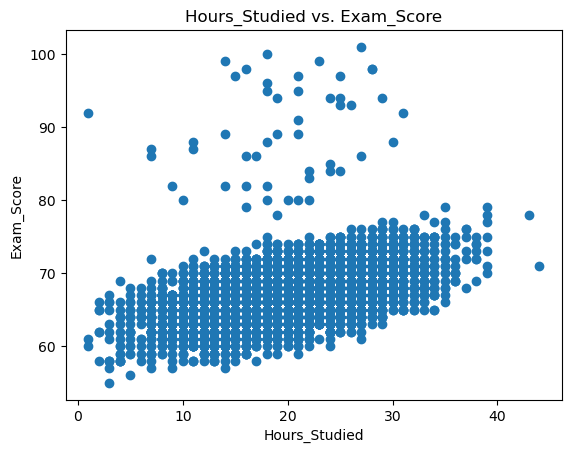

Text(0.5, 1.0, 'Attendance vs. Exam_Score')

Text(0.5, 0, 'Attendance')

Text(0, 0.5, 'Exam_Score')

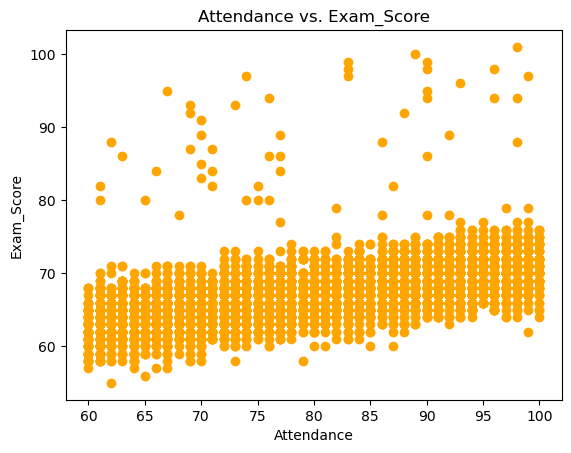

In [204]:
plt.scatter(df2['Hours_Studied'], df2['Exam_Score'])
plt.title('Hours_Studied vs. Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.show()

plt.scatter(df2['Attendance'], df2['Exam_Score'], color='orange')
plt.title('Attendance vs. Exam_Score')
plt.xlabel('Attendance')
plt.ylabel('Exam_Score')
plt.show()

#### 3.1.1. <a id='toc3_1_1_'></a>[Finding 1](#toc0_)

Both hours studied and student attendance are positively correlated with exam scores, and when combined, these two features explain 53% of the variance in exam scores (total R-squared 0.53).

Hours studied and attendance both have positive coefficients (1.7112 and 2.2764 respectively) meaning they are both linearly related to exam scores. They also have p-values < 0.001 which means these features are statistically significant to the resulting exam score.

<div class="alert alert-block alert-success">These results demonstrate to educators that both attendance and hours studied play a big role in affecting students' exam scores. We propose an incentive system for attendance and extra study sessions to increase the amount of hours studied.</div>

### 3.2. <a id='toc3_2_'></a>[Hypothesis 2](#toc0_)
***Lower motivation levels are associated with lower exam scores, and vice versa, higher motivation levels are positively associated with higher exam scores.***

#### Single Linear Regression

In [205]:
single_linear_regression('Motivation_Level', X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Multiple Linear Regression

In [206]:
multiple_linear_regression(['Motivation_Level'], X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Visualization

<Axes: xlabel='Motivation_Level'>

Text(0.5, 1.0, 'Average Exam_Score by Motivation_Level')

Text(0.5, 0, 'Motivation_Level')

Text(0, 0.5, 'Average Exam_Score')

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '0.5'), Text(2, 0, '1.0')])

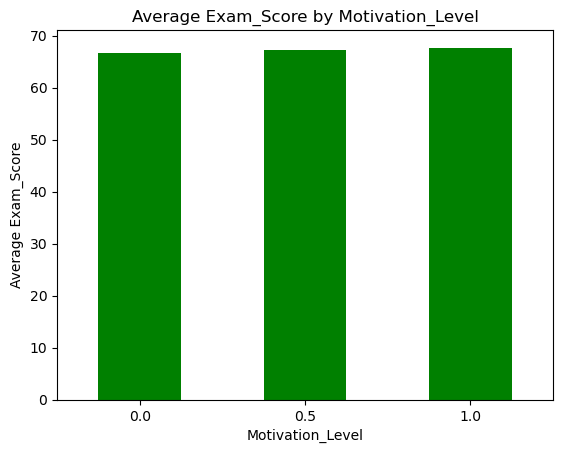

In [207]:
df2.groupby('Motivation_Level')['Exam_Score'].mean().plot(kind='bar', color='green')
plt.title('Average Exam_Score by Motivation_Level')
plt.xlabel('Motivation_Level')
plt.ylabel('Average Exam_Score')
plt.xticks(rotation=0)
plt.show()

#### 3.2.1. <a id='toc3_2_1_'></a>[Finding 2](#toc0_)

Motivation level has an R-squared value of 0.006 signifying a weak positive correlation with exam scores.

Motivation level has a positive coefficient of 0.298 which means that the feature is linearly related to exam scores. As such, this also means that a decrease in motivation levels will lead to a decrease in student performance. It also has a p-value < 0.001 meaning that it is statistically significant. However, the overall relationship between motivation level and student exam scores is weak.

<div class="alert alert-block alert-success">Due to motivation level being a weak predictor of students' exam performance, we suggest that educators focus more on impactful factors such as attendance and study habits. However, to not completely disregard the positive relationship, motivation can still be leveraged through creating more engaging lectures and teaching students about topics in a way that is relevant to their lives.</div>

### 3.3. <a id='toc3_3_'></a>[Hypothesis 3](#toc0_)
***High parental involvement and positive peer influence positively impact student performance in exams.***

#### Single Linear Regression

In [208]:
single_linear_regression('Parental_Involvement', X_scaled, y)
single_linear_regression('Peer_Influence', X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Multiple Linear Regression

In [209]:
multiple_linear_regression(['Parental_Involvement', 'Peer_Influence'], X_scaled, y)

NameError: name 'X_scaled' is not defined

#### Visualization

<Axes: xlabel='Parental_Involvement'>

Text(0.5, 1.0, 'Average Exam_Score by Parental_Involvement')

Text(0.5, 0, 'Parental_Involvement')

Text(0, 0.5, 'Average Exam_Score')

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '0.5'), Text(2, 0, '1.0')])

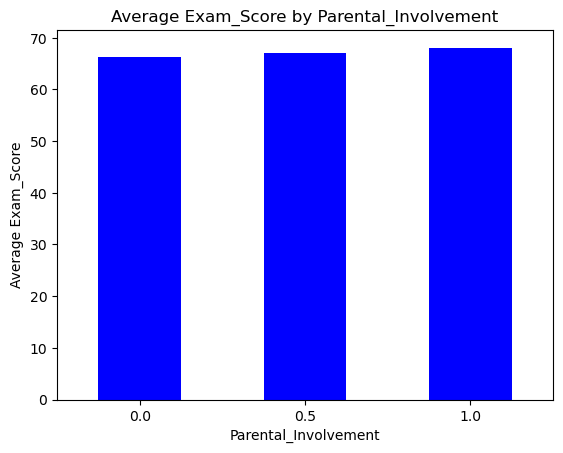

<Axes: xlabel='Peer_Influence'>

Text(0.5, 1.0, 'Average Exam_Score by Peer_Influence')

Text(0.5, 0, 'Peer_Influence')

Text(0, 0.5, 'Average Exam_Score')

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '0.5'), Text(2, 0, '1.0')])

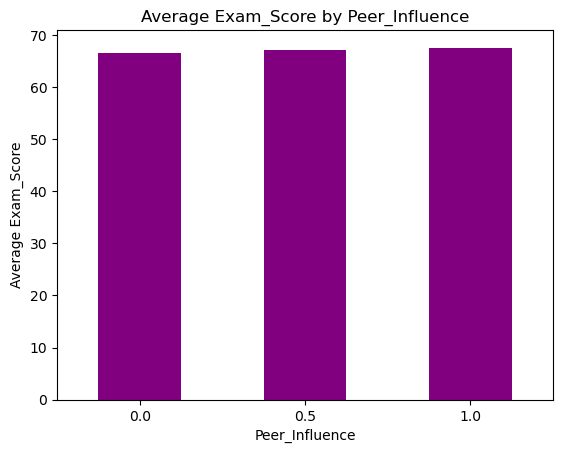

In [210]:
df2.groupby('Parental_Involvement')['Exam_Score'].mean().plot(kind='bar', color='blue')
plt.title('Average Exam_Score by Parental_Involvement')
plt.xlabel('Parental_Involvement')
plt.ylabel('Average Exam_Score')
plt.xticks(rotation=0)
plt.show()

df2.groupby('Peer_Influence')['Exam_Score'].mean().plot(kind='bar', color='purple')
plt.title('Average Exam_Score by Peer_Influence')
plt.xlabel('Peer_Influence')
plt.ylabel('Average Exam_Score')
plt.xticks(rotation=0)
plt.show()

#### 3.3.1. <a id='toc3_3_1_'></a>[Finding 3](#toc0_)

Parental involvement and peer influence are both positively associated with exam scores, and these two features explain roughly 3.3% of the variance in exam performance (total R-squared 0.033).

Although this relationship is weaker than that of attendance and hours studied, these two features are stronger predictors than exam performance, thus, high parental involvement and positive peer influence can positively impact student performance in exams. Both of these features have a p-value < 0.001 meaning that they are statistically significant. In addition, they have coefficients of 0.6066 and 0.3760) respectively. Since both coefficients are positive, this suggests a linear relationship between parental involvement vs. exam scores and peer influence vs. exam scores.

<div class="alert alert-block alert-success">We propose educators set up quarterly parent-teacher conference meetings to discuss the importance of parents being involved in their students' lives. In addition, fostering a welcoming and respectful environment, and organizing peer mentorship programs is a great way to boost peer influence.</div>

### 3.4. <a id='toc3_4_'></a>[Feature Importances](#toc0_)

Beyond our analysis of the relationships between specific variables and exam scores, we wanted to create a more comprehensive view of the importance of each input feature in the model's decision-making process when predicting exam scores. We will employ various methods to do this.

#### 3.4.1. <a id='toc3_4_1_'></a>[Scaling input variables](#toc0_)
This will ensure that features with different ranges of values do not disproportionately influence the model's predicitions.

In [211]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df2.drop(columns='Exam_Score'))

# Convert the scaled data back to a DataFrame
scaled_df2 = pd.DataFrame(scaled_data, columns=df2.drop(columns='Exam_Score').columns)

# Add the target variable back to the scaled DataFrame
scaled_df2['Exam_Score'] = df2['Exam_Score'].values

# Display the scaled data
scaled_df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,0.504942,0.348375,-1.562146,-1.214685,-0.019796,-1.302866,-1.060721,1.070550,0.855746,67
1,-0.162822,-1.383736,-1.562146,-1.214685,0.661399,-1.302866,0.285971,-1.575587,-1.168570,61
2,0.671882,1.560853,-0.124267,0.823259,-0.019796,0.134442,0.285971,-0.252518,0.855746,74
3,1.506587,0.781403,-1.562146,0.823259,0.661399,0.134442,0.285971,-1.575587,0.855746,71
4,-0.162822,1.041220,-0.124267,0.823259,-0.700990,0.134442,0.285971,-0.252518,-1.168570,70


#### 3.4.2. <a id='toc3_4_2_'></a>[<font color = green>***Random Forest***</font>](#toc0_)
Random forest description

RandomForestRegressor(random_state=42)

,Feature,Importance
1,Attendance,0.424139
0,Hours_Studied,0.286563
4,Sleep_Hours,0.065404
2,Parental_Involvement,0.053434
6,Family_Income,0.043278
5,Motivation_Level,0.041334
7,Peer_Influence,0.039990
3,Extracurricular_Activities,0.025296
8,Gender,0.020561


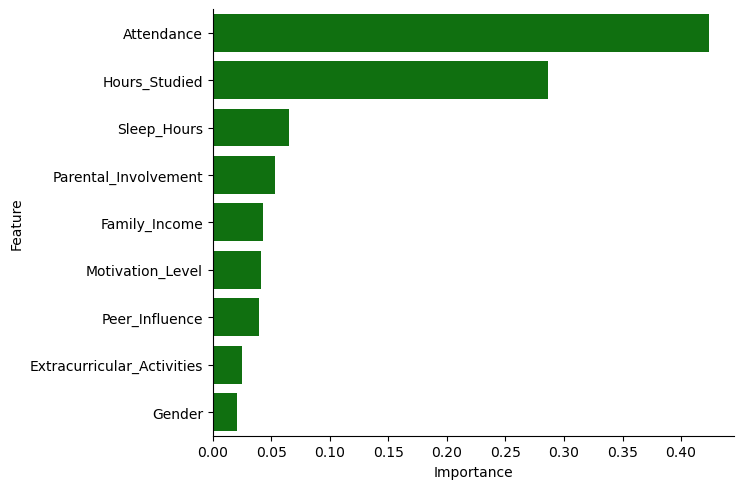

In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = scaled_df2.drop(columns='Exam_Score')
y = scaled_df2['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances_regressor = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances_regressor = pd.DataFrame({'Feature': X.columns, 'Importance': importances_regressor})
feature_importances_regressor.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances_regressor

# Plot the feature importances
sns.catplot(x='Importance', y='Feature', data=feature_importances_regressor, kind='bar', height=5, aspect=1.5, color='green')

#### 3.4.3. <a id='toc3_4_3_'></a>[<font color = purple>***Permutation***</font>](#toc0_)
Permutation description

,Feature,Importance
1,Attendance,0.772669
0,Hours_Studied,0.481188
2,Parental_Involvement,0.071616
6,Family_Income,0.028155
5,Motivation_Level,0.017769
3,Extracurricular_Activities,0.012504
7,Peer_Influence,0.007553
4,Sleep_Hours,0.007483
8,Gender,-0.006695


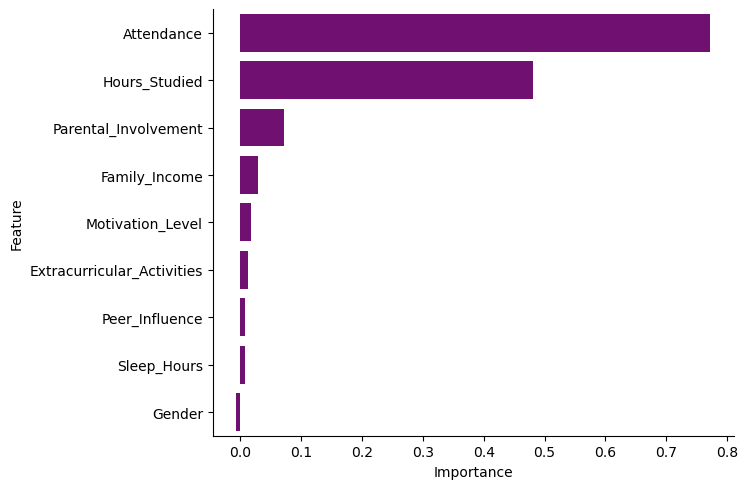

In [215]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result_scaled = permutation_importance(rf_scaled, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Create a DataFrame for better visualization
forest_importances_permutation = pd.DataFrame({'Feature': X.columns, 'Importance': result_scaled.importances_mean})
forest_importances_permutation.sort_values(by='Importance', ascending=False, inplace=True)
forest_importances_permutation

# Plot the feature importances
sns.catplot(x='Importance', y='Feature', data=forest_importances_permutation, kind='bar', height=5, aspect=1.5, color='purple')

#### 3.4.4. <a id='toc3_4_4_'></a>[<font color = orange>***Lasso Regression***</font>](#toc0_)
Lasso regression description

,Coefficient
Attendance,2.189560
Hours_Studied,1.664611
Parental_Involvement,0.558998
Family_Income,0.281625
Motivation_Level,0.273168
Peer_Influence,0.272071
Extracurricular_Activities,0.173226
Sleep_Hours,-0.000000
Gender,-0.000000


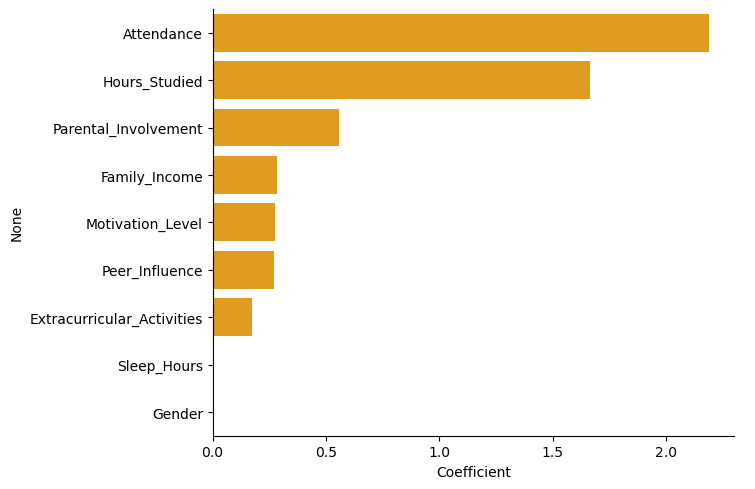

In [216]:
from sklearn.linear_model import Lasso

# Fit the Lasso model
X = scaled_df2.drop(columns = 'Exam_Score').values
y = df2['Exam_Score'].values
names = df2.drop(columns = 'Exam_Score', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Create a DataFrame for better visualization
input_var = scaled_df2.drop(columns = 'Exam_Score')
dict = {}
index=0
for column in input_var:
    dict[column] = lasso_coef[index]
    index+=1

feat_coefs = pd.DataFrame.from_dict(dict, orient='index', columns=['Coefficient'])
feat_coefs.sort_values(by='Coefficient', ascending=False, inplace=True)
feat_coefs

# Plot the feature importances
sns.catplot(x='Coefficient', y=feat_coefs.index, data=feat_coefs, kind='bar', height=5, color = 'orange', aspect=1.5)

#### 3.4.5. <a id='toc3_4_5_'></a>[Findings](#toc0_)